<div class="alert alert-block alert-info">
<center> <h1> BUSINESS CASE 5 - CRYPTO DASHBOARD  </h1> </center> <br>
<center> PROJECT 2021/2022 - MDSAA-BA </center>

**GROUP U:**    <br> 
- Beatriz Ferreira (20210630) <br>
- Beatriz Peres (20210910) <br>
- Diogo Marques (20210605) <br>
- Miriam Hadidi (20210644)

### Important Note:<br>
This notebook was used to test out various data and visualizations. *It does not deploy the dashboard.*<br>
For complete dashboard code, please see the github repository for the PyCharm and data files located here:
https://github.com/mnhadidi/GroupU-BC5

**Table of Contents** <br>
[1. Imports](#import)<br>
[2 Getting Data on Cryptos & Stocks](#assets)<br>
<br>
[3. Candlestick Plot with Moving Average](#candlestick-sma)<br>
[4. Prediction Model, Plot, & Table](#prediction)<br>
[5. Relative Strength Index & Gauge](#rsi)<br>
[6. Exploring Indicators and Other Features](#indicators)<br>
[7. Crypto-Stock Portfolio Comparison](#crypto-stock-compare)<br>
[8. Kraken API Data Pull](#api)<br>
[9. Fear & Greed Index Gauge](#fear/greed)<br>
[10. Top 10 Lists](#top10)<br>
[11. News Articles](#news)<br>
[12. World Stock Indices Trending](#world-indices)<br>

<hr>
<a class="anchor" id="import">
    
# 1. Imports
</a>

In [2]:
# imports
from bs4 import BeautifulSoup 
from dash import dcc, html
from plotly.subplots import make_subplots
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from typing import Callable
import dash
import dash_bootstrap_components as dbc
import datetime
import json
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import plotly.graph_objects as go
import plotly.graph_objs as go
import requests
import talib
import time
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

In [3]:
# # installations
# ! pip install html5lib
# ! pip install dash
# ! pip install TA-Lib

In [5]:
# getting data
df_BTC = yf.download(tickers=('BTC-USD'), period = 'max', interval = '1d')

[*********************100%***********************]  1 of 1 completed


In [6]:
df_BTC

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2022-05-25,29653.134766,30157.785156,29384.949219,29562.361328,29562.361328,27525063551
2022-05-26,29564.777344,29834.160156,28261.906250,29267.224609,29267.224609,36774325352
2022-05-27,29251.140625,29346.943359,28326.613281,28627.574219,28627.574219,36582005748


<a class="anchor" id="assets">

# 2. Getting Data on Cryptos & Stocks

</a>

In [120]:
# creating dataframe of crypto with api

url = 'https://web-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
df = pd.DataFrame()

for start in range(1, 20000, 5000):

    params = {
        'start': start,
        'limit': 5000,
    }

    r = requests.get(url, params=params)
    data = r.json()
    
    
    for number, item in enumerate(data['data']):
        df2 = pd.DataFrame({'Coin': [item['symbol']],'Name': [item['name'] + " (" + item['symbol'] + ")"]})
        df = pd.concat([df, df2], ignore_index = True, axis = 0)

In [121]:
df

,Coin,Name
0,BTC,Bitcoin (BTC)
1,ETH,Ethereum (ETH)
2,USDT,Tether (USDT)
3,BNB,BNB (BNB)
4,USDC,USD Coin (USDC)
...,...,...
10030,XTRI,Tribar (XTRI)
10031,TPAD,TANKPAD (TPAD)
10032,DVLD,DIVI LAND (DVLD)
10033,FJT,Fuji (FJT)


In [122]:
# putting df in csv for faster retrieval
df.to_csv(r'C:\Users\Mimi\PycharmProjects\cryptodash-groupu\assets\coin-list.csv', index = False)

In [109]:
df

,Coin
0,NFCR


In [117]:
# pulling csv of crypto
coins_df = pd.read_csv("C:/Users/Mimi/PycharmProjects/cryptodash-groupu/assets/coin-list.csv")
coin_dict_v2 = coins_df.set_index('Coin')['Name'].to_dict()
coin_dict_v2

{'BTC': 'Bitcoin',
 'ETH': 'Ethereum',
 'USDT': 'Tether',
 'USDC': 'USD Coin Bridged',
 'BNB': 'BNB',
 'XRP': 'XRP',
 'BUSD': 'Binance USD',
 'ADA': 'Cardano',
 'SOL': 'SOL RUNE - Rune.Game',
 'DOGE': 'Dogecoin',
 'DOT': 'Polkadot',
 'WBTC': 'Wrapped Bitcoin',
 'TRX': 'TRON',
 'AVAX': 'Avalanche',
 'DAI': 'Dai',
 'SHIB': 'Shiba Inu',
 'MATIC': 'Polygon',
 'LTC': 'Litecoin',
 'LEO': 'AstroFarms Finance',
 'CRO': 'Cronos',
 'NEAR': 'NEAR Protocol',
 'UNI': 'UNICORN Token',
 'FTT': 'FTX Token',
 'BCH': 'Bitcoin Cash',
 'XMR': 'Monero',
 'XLM': 'Stellar',
 'LINK': 'Chainlink',
 'ETC': 'Ethereum Classic',
 'ATOM': 'Cosmos',
 'FLOW': 'Flow',
 'ALGO': 'Algorand',
 'APE': 'JUST $APE',
 'VET': 'VeChain',
 'HBAR': 'Hedera',
 'MANA': 'Genesis Mana',
 'EGLD': 'Elrond',
 'XTZ': 'Tezos',
 'ICP': 'Internet Computer',
 'FIL': 'Filecoin',
 'SAND': 'The Sandbox',
 'KCS': 'KuCoin Token',
 'AAVE': 'Aave',
 'ZEC': 'Zcash',
 'EOS': 'EOS',
 'KLAY': 'Klaytn',
 'AXS': 'Axie Infinity',
 'MKR': 'Maker',
 'THETA'

In [116]:
coins_df

,Coin,Name
0,BTC,Bitcoin
1,ETH,Ethereum
2,USDT,Tether
3,USDC,USD Coin
4,BNB,BNB
...,...,...
10030,XTRI,Tribar
10031,TPAD,TANKPAD
10032,DVLD,DIVI LAND
10033,FJT,Fuji


In [852]:
# defining function to pull all crypto and stock from saved CSVs
def cleanup_ticker_info():
    stock_list = pd.read_csv("C:/Users/Mimi/PycharmProjects/cryptodash-groupu/data/stock-full-list.csv")
    coin_list = pd.read_csv("C:/Users/Mimi/PycharmProjects/cryptodash-groupu/data/coin-full-list.csv")

    #add stock to type
    stock_list['type'] = 'stock'
    # add text for dropdown
    stock_list['text'] = stock_list.apply(lambda x: x['Name'] + ' (' + x['Symbol'] + ')', axis=1)
    stock_list['yf'] = stock_list.apply(lambda x: x['Symbol'], axis=1)
    # add coin to type
    coin_list['type'] = 'coin'
    # rename column to match stock csv
    coin_list = coin_list.rename(columns={"Coin": "Symbol"})
    # add text for dropdown
    coin_list['text'] = coin_list.apply(lambda x: x['Name'], axis=1)
    coin_list['yf'] = coin_list.apply(lambda x: x['Symbol'] + '-USD', axis=1)
    # join the two tables
    # full_coin_stock_list = stock_list.append(coin_list, ignore_index=True)
    full_coin_stock_list = pd.concat([stock_list, coin_list], axis=0, ignore_index=True)
    full_coin_stock_list = full_coin_stock_list.sort_values(by=['Symbol'], ignore_index=True)

    return full_coin_stock_list

ticker_df = cleanup_ticker_info()

ticker_info = ticker_df.loc[ticker_df['yf'] == 'AAPL', 'Name'].iloc[0]

ticker_info

'Apple Inc. Common Stock'

In [853]:
# testing
ticker_info = ticker_df.loc[ticker_df['yf'] == 'ADA-USD', 'Name'].iloc[0]

ticker_info

'Cardano (ADA)'

In [835]:
resp['Data'][0]['CoinInfo']['Name']

'BTC'

In [821]:
stock_list = pd.read_csv("C:/Users/Mimi/PycharmProjects/cryptodash-groupu/data/stock-full-list.csv")
coin_list = pd.read_csv("C:/Users/Mimi/PycharmProjects/cryptodash-groupu/data/coin-full-list.csv")

In [824]:
stock_list['type'] = 'stock'

stock_list['text'] = stock_list.apply(lambda x: '[ST] ' + x['Name'] +' (' + x['Symbol'] + ')', axis=1)
stock_list['yf'] = stock_list.apply(lambda x: x['Symbol'], axis=1)


stock_list

,Symbol,Name,type,text,yf
0,A,Agilent Technologies Inc. Common Stock,stock,[ST] Agilent Technologies Inc. Common Stock (A),A
1,AA,Alcoa Corporation Common Stock,stock,[ST] Alcoa Corporation Common Stock (AA),AA
2,AAC,Ares Acquisition Corporation Class A Ordinary ...,stock,[ST] Ares Acquisition Corporation Class A Ordi...,AAC
3,AACG,ATA Creativity Global American Depositary Shares,stock,[ST] ATA Creativity Global American Depositary...,AACG
4,AACI,Armada Acquisition Corp. I Common Stock,stock,[ST] Armada Acquisition Corp. I Common Stock (...,AACI
...,...,...,...,...,...
8535,ZWS,Zurn Water Solutions Corporation Common Stock,stock,[ST] Zurn Water Solutions Corporation Common S...,ZWS
8536,ZY,Zymergen Inc. Common Stock,stock,[ST] Zymergen Inc. Common Stock (ZY),ZY
8537,ZYME,Zymeworks Inc. Common Shares,stock,[ST] Zymeworks Inc. Common Shares (ZYME),ZYME
8538,ZYNE,Zynerba Pharmaceuticals Inc. Common Stock,stock,[ST] Zynerba Pharmaceuticals Inc. Common Stock...,ZYNE


In [825]:
coin_list['type'] = 'coin'
coin_list = coin_list.rename(columns={"Coin": "Symbol"})

coin_list['text'] = coin_list.apply(lambda x: x['Name'], axis=1)
coin_list['yf'] = coin_list.apply(lambda x: x['Symbol'] +'-USD', axis=1)

coin_list

,Symbol,Name,type,text,yf
0,BTC,Bitcoin (BTC),coin,Bitcoin (BTC),BTC-USD
1,ETH,Ethereum (ETH),coin,Ethereum (ETH),ETH-USD
2,USDT,Tether (USDT),coin,Tether (USDT),USDT-USD
3,BNB,BNB (BNB),coin,BNB (BNB),BNB-USD
4,USDC,USD Coin (USDC),coin,USD Coin (USDC),USDC-USD
...,...,...,...,...,...
10030,XTRI,Tribar (XTRI),coin,Tribar (XTRI),XTRI-USD
10031,TPAD,TANKPAD (TPAD),coin,TANKPAD (TPAD),TPAD-USD
10032,DVLD,DIVI LAND (DVLD),coin,DIVI LAND (DVLD),DVLD-USD
10033,FJT,Fuji (FJT),coin,Fuji (FJT),FJT-USD


In [830]:
full_coin_stock_list = stock_list.append(coin_list, ignore_index=True)
full_coin_stock_list = full_coin_stock_list.sort_values(by=['Symbol'], ignore_index=True)
full_coin_stock_list

,Symbol,Name,type,text,yf
0,$ADOGE,Arabian Doge ($ADOGE),coin,Arabian Doge ($ADOGE),$ADOGE-USD
1,$ADS,Alkimi ($ADS),coin,Alkimi ($ADS),$ADS-USD
2,$AFLOKI,AngryFloki ($AFLOKI),coin,AngryFloki ($AFLOKI),$AFLOKI-USD
3,$ALPHA,Alpha Nodes ($ALPHA),coin,Alpha Nodes ($ALPHA),$ALPHA-USD
4,$ANRX,AnRKey X ($ANRX),coin,AnRKey X ($ANRX),$ANRX-USD
...,...,...,...,...,...
18570,xZAR,South African Tether (xZAR),coin,South African Tether (xZAR),xZAR-USD
18571,yBAN,BananoDOS (yBAN),coin,BananoDOS (yBAN),yBAN-USD
18572,yTSLA,yTSLA Finance (yTSLA),coin,yTSLA Finance (yTSLA),yTSLA-USD
18573,yVault LP-yCurve(YYCRV),yVault LP-yCurve (yVault LP-yCurve(YYCRV)),coin,yVault LP-yCurve (yVault LP-yCurve(YYCRV)),yVault LP-yCurve(YYCRV)-USD


In [849]:
name_return = full_coin_stock_list.loc[full_coin_stock_list['Symbol'] == 'BTC', 'Name'].iloc[0]
name_return

'Bitcoin (BTC)'

In [831]:
stock_df = yf.download(tickers=('$ADS-USD'), period='1y', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [832]:
coin = []
coin_name = []
last_close_price = []
thirty_day_prc_change = []
one_day_prc_change = []
bear_bull = []
coin_image = []
    
for line in resp['Data']:
    coin.append(line['CoinInfo']['Name'])
    coin_name.append(line['CoinInfo']['FullName'])
    long_form = ticker_df['yf'][line['CoinInfo']['Name']]
    url_begin = 'https://cryptologos.cc/logos/'
    url_end = '-logo.png?v=022'
        long_form = long_form.lower().replace("(", "").replace(")", "").replace(" ", "-")
        full_url = url_begin + long_form + url_end

        r = requests.get(full_url)
        if 200 <= r.status_code <= 299:
            coin_image.append(full_url)
        else:
            coin_image.append('/assets/other.png')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-26,0.653327,0.761633,0.424317,0.610121,0.610121,6721494
2021-08-27,0.611144,0.938106,0.378374,0.424034,0.424034,2785753
2021-08-28,0.424042,0.666922,0.417425,0.462679,0.462679,922841
2021-08-29,0.462681,0.550251,0.404111,0.496427,0.496427,468978
2021-08-30,0.495935,0.587490,0.450803,0.452778,0.452778,371014
...,...,...,...,...,...,...
2022-05-24,0.155008,0.156242,0.150785,0.153092,0.153092,843163
2022-05-25,0.153536,0.153903,0.151324,0.152466,0.152466,845414
2022-05-26,0.152491,0.153281,0.144218,0.151669,0.151669,852233


<hr>
<a class="anchor" id="candlestick-sma">
    
# 3. Candlestick Plot with Moving Average
</a>

In [7]:
# defining a new function to create a new candlestick visualtion with SMA added in

def candlestick_fig_create(coin_df):
    # adding SMA50 and SMA100
    coin_df.loc[:, 'SMA50'] = coin_df['Close'].rolling(window=50).mean()
    coin_df.loc[:, 'SMA100'] = coin_df['Close'].rolling(window=100).mean()

    candlestick_fig = go.Figure(
        data=[
            go.Candlestick(
                x=coin_df.index.values,
                open=coin_df["Open"],
                high=coin_df["High"],
                low=coin_df["Low"],
                close=coin_df["Close"],
                increasing_line_color=project_colors['green'],
                decreasing_line_color=project_colors['red'],
                name='Close'
            )
        ]
    )

    # sma50
    candlestick_fig.add_trace(
        go.Scatter(x=coin_df.index.values, y=coin_df["SMA50"], name='SMA50',
                   line=dict(color='rgba(255,255,255,0.3)'), mode='lines'))

    # sma100
    candlestick_fig.add_trace(
        go.Scatter(x=coin_df.index.values, y=coin_df["SMA100"], name='SMA100',
                   line=dict(color='rgba(255,255,255,0.7)'), mode='lines'))

    # Edit the layout
    candlestick_fig.update_layout(xaxis_title='Date', yaxis_title='Price USD', plot_bgcolor='rgba(0,0,0,0)',
                                  paper_bgcolor='rgba(0,0,0,0)')
    candlestick_fig.update_layout(title_font_color='#FFFFFF', font_color='#FFFFFF')
    candlestick_fig.update_layout(xaxis_rangeslider_visible=False, margin=dict(l=20, r=16, t=20, b=20))

    candlestick_fig.update_xaxes(gridcolor='rgba(255,255,255,0.2)')
    candlestick_fig.update_yaxes(gridcolor='rgba(255,255,255,0.2)')

    return candlestick_fig

<a class="anchor" id="prediction">

# 4. Prediction Model, Plot & Table

</a>

In [21]:
##########################
# LINEAR REGRESSION MODEL
# used on asset_insight_layout
##########################

def run_linear_regression(orig_coin_df):
    orig_coin_df.dropna(inplace=True)
    orig_coin_df = orig_coin_df.reset_index()
    coin_plot_df = orig_coin_df
    coin_df_train = orig_coin_df[-60:]

    required_features = ['Open', 'High', 'Low', 'Volume']
    output_label = 'Close'

    x_train, x_test, y_train, y_test = train_test_split(
        coin_df_train[required_features],
        coin_df_train[output_label],
        test_size=0.2,
        random_state=0,
        shuffle=False
    )

    model = LinearRegression()
    model.fit(x_train, y_train)

    future_set = orig_coin_df.shift(periods=30).tail(30)

    prediction = model.predict(x_test)

    # start date
    start_date = datetime.today()
    start_date = start_date.replace(hour=0, minute=0, second=0, microsecond=0)

    dates = pd.date_range(start=start_date, periods=30).to_pydatetime().tolist()

    prediction = prediction[0:30]

    return orig_coin_df, prediction, dates

In [22]:
##########################
# LINEAR REGRESSION PLOT
# used on asset_insight_layout
##########################
def create_pred_plot(orig_coin_df, prediction, dates):
    prediction_fig = go.Figure()
    # Create and style traces
    # close price line
    prediction_fig = prediction_fig.add_trace(
        go.Scatter(x=orig_coin_df['Date'], y=orig_coin_df["Close"], name='Historical',
                   line=dict(color=project_colors['pink']), mode='lines'))
    # prediction line
    prediction_fig = prediction_fig.add_trace(
        go.Scatter(x=dates, y=prediction, name='Prediction',
                   line=dict(color=project_colors['gold']),
                   mode='lines'))


    # Edit the layout
    prediction_fig = prediction_fig.update_layout(xaxis_title='Date',
                                                  yaxis_title='Price USD')

    prediction_fig = prediction_fig.update_layout(margin=dict(l=20, r=16, t=20, b=20))

    prediction_fig.update_layout(xaxis_title='Date', yaxis_title='Price USD', plot_bgcolor='rgba(0,0,0,0)',
                                 paper_bgcolor='rgba(0,0,0,0)')
    prediction_fig.update_layout(title_font_color='#FFFFFF', font_color='#FFFFFF')
    prediction_fig.update_xaxes(gridcolor='rgba(255,255,255,0.2)')
    prediction_fig.update_yaxes(gridcolor='rgba(255,255,255,0.2)')

    prediction_fig = prediction_fig.update_layout(legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ))

    return prediction_fig

In [23]:
##########################
# TABLE WITH NEXT PREDICTED PRICES
# used on asset_insight_layout
##########################
def get_pred_pric_table(prediction, dates):
    if (prediction.tolist())[0] < 1:
        formatted_pred = ['${:,.3f}'.format(member) for member in (prediction.tolist())]
    elif 1 <= (prediction.tolist())[0] < 1000:
        formatted_pred = ['${:,.2f}'.format(member) for member in (prediction.tolist())]
    else:
        formatted_pred = ['${:,.0f}'.format(member) for member in (prediction.tolist())]

    formatted_dates = [member.strftime('%d/%m/%Y') for member in dates][0:len(formatted_pred)]

    table_header = [
        html.Tr([
            html.Th("Date",style={'color':'#ffffff'}),
            html.Th("Close Price",style={'color':'#ffffff','text-align':'right'}),
        ])
    ]

    rows = []

    for i in range(0,10):

        row = html.Tr([
            html.Td(formatted_dates[i], style={'color': '#ffffff'}),
            html.Td(formatted_pred[i], style={'color': '#ffffff','text-align':'right'}),
        ])

        rows.append(row)

    table_header.extend(rows)

    table = dbc.Table([html.Tbody(table_header)], bordered=False, responsive=True, style={'border-bottom': '1px solid rgba(255,255,255,0.1)'})

    return table

In [861]:
def run_linear_regression(orig_coin_df):
    orig_coin_df.dropna(inplace=True)
    orig_coin_df = orig_coin_df.reset_index()
    coin_plot_df = orig_coin_df
    coin_df_train = orig_coin_df[-60:]

    required_features = ['Open', 'High', 'Low', 'Volume']
    output_label = 'Close'

    x_train, x_test, y_train, y_test = train_test_split(
        coin_df_train[required_features],
        coin_df_train[output_label],
        test_size=0.2,
        random_state=0,
        shuffle=False
    )

    model = LinearRegression()
    model.fit(x_train, y_train)

    future_set = orig_coin_df.shift(periods=30).tail(30)

    prediction = model.predict(x_test)

    dates = pd.date_range(start=dt.today(), periods=30).to_pydatetime().tolist()

    prediction = prediction[0:30]

    return orig_coin_df, prediction, dates

In [874]:
coin_df = yf.download(tickers=('BTC-USD'), period='1y', interval='1d')

orig_coin_df, prediction, dates = run_linear_regression(coin_df)

[*********************100%***********************]  1 of 1 completed


In [881]:
if (prediction.tolist())[0] < 1:
    formatted_pred = ['${:,.3f}'.format(member) for member in (prediction.tolist())]
elif 1 <= (prediction.tolist())[0] < 1000:
    formatted_pred = ['${:,.2f}'.format(member) for member in (prediction.tolist())]
else:
    formatted_pred = ['${:,.0f}'.format(member) for member in (prediction.tolist())]


formatted_dates = [member.strftime('%d/%m/%Y') for member in dates][0:len(formatted_pred)]

formatted_dates

['29/05/2022',
 '30/05/2022',
 '31/05/2022',
 '01/06/2022',
 '02/06/2022',
 '03/06/2022',
 '04/06/2022',
 '05/06/2022',
 '06/06/2022',
 '07/06/2022',
 '08/06/2022',
 '09/06/2022']

<a class="anchor" id="rsi">

# 5. Relative Strength Index & Gauge

</a>

In [319]:
# reviewing df
df_BTC = yf.download(tickers=('BTC-USD'), period='max', interval='1d')
df_BTC

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2022-05-22,29432.472656,30425.861328,29275.183594,30323.722656,30323.722656,21631532270
2022-05-23,30309.396484,30590.585938,28975.560547,29098.910156,29098.910156,31483454557
2022-05-24,29101.125000,29774.355469,28786.589844,29655.585938,29655.585938,26616506245


In [320]:
# defining function to calculate RSI

def RSI(df_BTC, window=14, adjust=False):
    delta = df_BTC['Close'].diff(1).dropna()
    loss = delta.copy()
    gains = delta.copy()

    gains[gains < 0] = 0
    loss[loss > 0] = 0

    gain_ewm = gains.ewm(com=window - 1, adjust=adjust).mean()
    loss_ewm = abs(loss.ewm(com=window - 1, adjust=adjust).mean())

    RS = gain_ewm / loss_ewm
    RSI = 100 - 100 / (1 + RS)

    return RSI

In [321]:
reversed_df = df_BTC.iloc[::-1]
df_BTC["RSI"] = talib.RSI(reversed_df["Close"], 14)

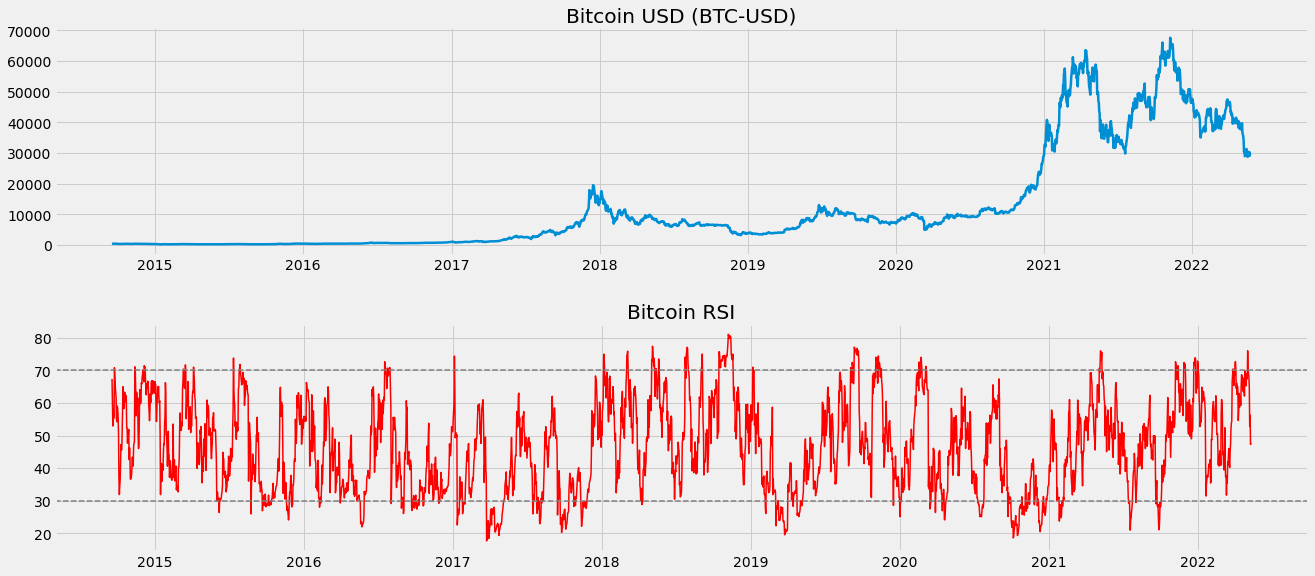

In [322]:
# plotting RSI alongside historical data
ax1 = plt.subplot2grid((10, 1), (0, 0), rowspan=4, colspan=1)
ax2 = plt.subplot2grid((10, 1), (5, 0), rowspan=4, colspan=1)
ax1.plot(df_BTC['Close'], linewidth=2.5)
ax1.set_title('Bitcoin USD (BTC-USD)')
ax2.plot(df_BTC['RSI'], color='red', linewidth=1.5)
ax2.axhline(30, linestyle='--', linewidth=1.5, color='grey')
ax2.axhline(70, linestyle='--', linewidth=1.5, color='grey')
ax2.set_title('Bitcoin RSI')

plt.show()

In [324]:
df_BTC["RSI"].tail(20)

Date
2022-05-07    67.999117
2022-05-08    64.686769
2022-05-09    52.874699
2022-05-10    56.245601
2022-05-11    47.274278
2022-05-12    47.759739
2022-05-13          NaN
2022-05-14          NaN
2022-05-15          NaN
2022-05-16          NaN
2022-05-17          NaN
2022-05-18          NaN
2022-05-19          NaN
2022-05-20          NaN
2022-05-21          NaN
2022-05-22          NaN
2022-05-23          NaN
2022-05-24          NaN
2022-05-25          NaN
2022-05-26          NaN
Name: RSI, dtype: float64

In [333]:
score = talib.CDLMORNINGSTAR(df['Open'], df['High'], df['Low'], df['Adj Close'])

# Returns a lot of ZEROS
print(score)

Date
2021-05-26    0
2021-05-27    0
2021-05-28    0
2021-05-29    0
2021-05-30    0
             ..
2022-05-22    0
2022-05-23    0
2022-05-24    0
2022-05-25    0
2022-05-26    0
Length: 366, dtype: int32


In [334]:
# Filter wherre score not equal to Zero
print(score[score != 0])

Date
2021-12-11    100
dtype: int32


In [336]:
score = talib.CDLENGULFING(df['Open'], df['High'], df['Low'], df['Adj Close'])

# Filter wherre score not equal to Zero
print(score[score != 0])

Date
2021-06-04   -100
2021-06-09    100
2021-06-12   -100
2021-07-11    100
2021-07-12   -100
2021-07-15   -100
2021-07-19   -100
2021-07-21    100
2021-08-09    100
2021-08-24   -100
2021-08-26   -100
2021-08-27    100
2021-09-05    100
2021-09-07   -100
2021-09-10   -100
2021-09-14    100
2021-09-22    100
2021-09-27   -100
2021-10-03    100
2021-10-11    100
2021-10-21   -100
2021-10-25    100
2021-10-28    100
2021-11-02    100
2021-11-06    100
2021-11-15   -100
2021-11-26   -100
2021-11-30   -100
2021-12-13   -100
2021-12-16   -100
2021-12-23    100
2021-12-25   -100
2022-01-11    100
2022-01-27    100
2022-02-02   -100
2022-02-06    100
2022-02-10   -100
2022-02-14    100
2022-02-24    100
2022-02-28    100
2022-03-06   -100
2022-03-08    100
2022-03-14    100
2022-03-16    100
2022-03-18    100
2022-03-20   -100
2022-03-22    100
2022-04-03    100
2022-04-05   -100
2022-04-08   -100
2022-05-04    100
dtype: int32


In [331]:
score

Date
2014-09-17    0
2014-09-18    0
2014-09-19    0
2014-09-20    0
2014-09-21    0
             ..
2022-05-22    0
2022-05-23    0
2022-05-24    0
2022-05-25    0
2022-05-26    0
Length: 2809, dtype: int32

In [450]:
data_for_rsi = yf.download(tickers=('BTC-USD'), period='max', interval='1d')

# getting close data for RSI
def get_rsi_value(data_for_rsi):
    # Window length for moving average
    length = 14
    data_for_rsi = data_for_rsi.reset_index()
    # Dates
    start, end = datetime.datetime.today() - datetime.timedelta(days=30), datetime.datetime.today() - datetime.timedelta(days=1)

    # create mask to get data between start and end date
    mask = (data_for_rsi['Date'] >= start) & (data_for_rsi['Date'] <= end)
    data_for_rsi = data_for_rsi.loc[mask]
    # get only close price from data
    close = data_for_rsi['Close']

    # Define function to calculate the RSI
    def calc_rsi(over: pd.Series, fn_roll: Callable) -> pd.Series:
        # Get the difference in price from previous step
        delta = over.diff()
        # Get rid of the first row, which is NaN since it did not have a previous row to calculate the differences
        delta = delta[1:] 

        # Make the positive gains (up) and negative gains (down) Series
        up, down = delta.clip(lower=0), delta.clip(upper=0).abs()

        roll_up, roll_down = fn_roll(up), fn_roll(down)
        rs = roll_up / roll_down
        rsi = 100.0 - (100.0 / (1.0 + rs))

        # Avoid division-by-zero if `roll_down` is zero
        # This prevents inf and/or nan values.
        rsi[:] = np.select([roll_down == 0, roll_up == 0, True], [100, 0, rsi])
        rsi.name = 'rsi'

        # Assert range
        valid_rsi = rsi[length - 1:]
        assert ((0 <= valid_rsi) & (valid_rsi <= 100)).all()
        # Note: rsi[:length - 1] is excluded from above assertion because it is NaN for SMA.

        return rsi

    # Calculate RSI using RMA
    rsi_rma = calc_rsi(close, lambda s: s.ewm(alpha=1 / length).mean()).to_frame()  # Approximates TradingView.
        
    return rsi_rma['rsi'].iloc[-1]

rsi_value = get_rsi_value(data_for_rsi)
rsi_value

[*********************100%***********************]  1 of 1 completed


37.28982350005629

In [488]:
# defining colors and value for RSI visual
quadrant_colors = [plot_bgcolor, "#2bad4e", "#85e043", "#eff229", "#f2a529", "#f25829"]

rsi_value = get_rsi_value(data_for_rsi)

# visualizing with a gauge plot
fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = rsi_value,
    gauge = {
        'axis': {'range': [0, 100], 'tickwidth': 1, 'tickcolor': "black"},
        'bar': {'color': "rgba(0,0,0,0)"},
        'borderwidth': 0,
        'steps': [
            {'range': [0, 25], 'color': '#f25829'},
            {'range': [25, 50], 'color': '#eff229'},
            {'range': [50, 75], 'color': '#85e043'},
            {'range': [75, 100], 'color': '#2bad4e'}],
        'threshold': {
            'line': {'color': "black", 'width': 10},
            'thickness': 0.75,
            'value': rsi_value}}))

fig.show()

<a class="anchor" id="indicators">

# 6. Exploring Indicators & Other Features

</a>

In [497]:
Bitcoin = yf.Ticker("BTC")
Bitcoin.info

{'exchange': 'PCX',
 'shortName': 'ClearShares Piton Intermediate ',
 'longName': 'ClearShares Piton Intermediate Fixed Income ETF',
 'exchangeTimezoneName': 'America/New_York',
 'exchangeTimezoneShortName': 'EDT',
 'isEsgPopulated': False,
 'gmtOffSetMilliseconds': '-14400000',
 'quoteType': 'ETF',
 'symbol': 'BTC',
 'messageBoardId': 'finmb_683247102',
 'market': 'us_market',
 'annualHoldingsTurnover': None,
 'enterpriseToRevenue': None,
 'beta3Year': None,
 'profitMargins': None,
 'enterpriseToEbitda': None,
 '52WeekChange': None,
 'morningStarRiskRating': None,
 'forwardEps': None,
 'revenueQuarterlyGrowth': None,
 'fundInceptionDate': 1601510400,
 'annualReportExpenseRatio': None,
 'totalAssets': 32238336,
 'bookValue': None,
 'fundFamily': 'ClearShares',
 'lastFiscalYearEnd': None,
 'netIncomeToCommon': None,
 'trailingEps': None,
 'lastDividendValue': None,
 'SandP52WeekChange': None,
 'priceToBook': None,
 'nextFiscalYearEnd': None,
 'yield': None,
 'mostRecentQuarter': None,
 

In [309]:
# seeing what other info we can get using yf keys
print(Bitcoin.info.keys())

dict_keys(['exchange', 'shortName', 'longName', 'exchangeTimezoneName', 'exchangeTimezoneShortName', 'isEsgPopulated', 'gmtOffSetMilliseconds', 'quoteType', 'symbol', 'messageBoardId', 'market', 'annualHoldingsTurnover', 'enterpriseToRevenue', 'beta3Year', 'profitMargins', 'enterpriseToEbitda', '52WeekChange', 'morningStarRiskRating', 'forwardEps', 'revenueQuarterlyGrowth', 'fundInceptionDate', 'annualReportExpenseRatio', 'totalAssets', 'bookValue', 'fundFamily', 'lastFiscalYearEnd', 'netIncomeToCommon', 'trailingEps', 'lastDividendValue', 'SandP52WeekChange', 'priceToBook', 'nextFiscalYearEnd', 'yield', 'mostRecentQuarter', 'enterpriseValue', 'priceHint', 'threeYearAverageReturn', 'lastSplitDate', 'lastSplitFactor', 'legalType', 'lastDividendDate', 'morningStarOverallRating', 'earningsQuarterlyGrowth', 'priceToSalesTrailing12Months', 'pegRatio', 'ytdReturn', 'forwardPE', 'maxAge', 'lastCapGain', 'category', 'fiveYearAverageReturn', 'phone', 'longBusinessSummary', 'companyOfficers', 'p

In [310]:
# coin description
print(Bitcoin.info['longBusinessSummary'])

The investment seeks current income consistent with the long term preservation of capital.
 The fund is an actively managed exchange-traded fund ("ETF") that seeks to achieve its investment objective by investing, under normal market conditions, at least 80% of its net assets (plus borrowings for investment purposes) in debt securities and in derivatives and other instruments that have economic characteristics similar to such securities. It principally invests in U.S.-dollar denominated, investment-grade securities and seeks to typically maintain a dollar-weighted average portfolio maturity of zero to ten years. The fund is non-diversified.


In [3]:
# Retrieving List of World Major Stock Indices from Yahoo! Finance
df_list = pd.read_html('https://finance.yahoo.com/world-indices/')
majorStockIdx = df_list[0]
majorStockIdx.head(20)

,Symbol,Name,Last Price,Change,% Change,Volume,Intraday High/Low,52 Week Range,Day Chart
0,^GSPC,S&P 500,3901.36,0.57,+0.01%,3.002B,NaN,NaN,NaN
1,^DJI,Dow 30,31261.90,8.80,+0.03%,498.891M,NaN,NaN,NaN
2,^IXIC,Nasdaq,11354.62,-33.88,-0.30%,4.674B,NaN,NaN,NaN
3,^NYA,NYSE COMPOSITE (DJ),15080.98,45.08,+0.30%,0,NaN,NaN,NaN
4,^XAX,NYSE AMEX COMPOSITE INDEX,4043.39,30.57,+0.76%,0,NaN,NaN,NaN
5,^BUK100P,Cboe UK 100,736.47,9.80,+1.35%,0,NaN,NaN,NaN
6,^RUT,Russell 2000,1773.27,-2.95,-0.17%,0,NaN,NaN,NaN
7,^VIX,CBOE Volatility Index,29.43,0.08,+0.27%,0,NaN,NaN,NaN
8,^FTSE,FTSE 100,7389.98,87.24,+1.19%,0,NaN,NaN,NaN
9,^GDAXI,DAX PERFORMANCE-INDEX,13981.91,99.61,+0.72%,0,NaN,NaN,NaN


In [5]:
majorStockIdx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Symbol             36 non-null     object 
 1   Name               36 non-null     object 
 2   Last Price         36 non-null     float64
 3   Change             36 non-null     float64
 4   % Change           36 non-null     object 
 5   Volume             36 non-null     object 
 6   Intraday High/Low  0 non-null      float64
 7   52 Week Range      0 non-null      float64
 8   Day Chart          0 non-null      float64
dtypes: float64(5), object(4)
memory usage: 2.7+ KB


<a class="anchor" id="crypto-stock-compare">

# 7. Crypto-Stock Portfolio Comparison

</a>

In [644]:
#### CLEANUP DATA
# get full data from yahoo finance
s_p = yf.Ticker("^GSPC")
crypto_index = yf.Ticker("^CMC200")
# get historical data for 1y
hist_sp = s_p.history(period="1y")
hist_crypto = crypto_index.history(period="1y")
# reset index to get date as column
hist_sp = hist_sp.reset_index()
hist_crypto = hist_crypto.reset_index()
# setup column names for plot df
column_names = ["Date", "CloseCrypto", "CloseStock",'InvestCryptoVal','InvestStockVal']
# create plot df
df_plot = pd.DataFrame(columns = column_names)
# populate date, stock and crypto prices
df_plot = df_plot.assign(Date=hist_crypto['Date'], CloseCrypto=hist_crypto['Close'], CloseStock=hist_sp['Close'])
# remove empties of last 2 rows 
df_plot = df_plot[0:-2]
# getting percent change day to day
df_plot['InvestCryptoChang'] = df_plot['CloseCrypto'].pct_change() + 1
df_plot['InvestStockChang'] = df_plot['CloseStock'].pct_change() + 1
# initializing the investment with $1000
df_plot.loc[0:0, ('InvestCryptoVal','InvestBondVal','InvestStockVal')] = 1000
# calculate how much that 1000 would change day to day
for i in range(1, len(df_plot)):
    df_plot.loc[i, 'InvestCryptoVal'] = df_plot.loc[i-1, 'InvestCryptoVal'] * df_plot.loc[i, 'InvestCryptoChang']
    df_plot.loc[i, 'InvestStockVal'] = df_plot.loc[i-1, 'InvestStockVal'] * df_plot.loc[i, 'InvestStockChang']


#### CREATE CHART 
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_plot['Date'], y=df_plot['InvestCryptoVal'],
                    mode='lines',
                    name='Crypto Index (CMC Crypto 200)'))

fig.add_trace(go.Scatter(x=df_plot['Date'], y=df_plot['InvestStockVal'],
                    mode='lines',
                    name='Stock Index (S&P 500)'))
fig.add_hline(y=1000, opacity=0.5)
fig.update_layout(
    margin={'t': 20, 'l': 20, 'r': 20, 'b': 20},
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
)

fig.show()

In [696]:
# creating crypto vs stock simulation
## removed bond comparison because too flat

# plotting crypto index
def crypto_sim_ind(df_plot):
    value_sim = df_plot['InvestCryptoVal'].tail(1).tolist()[0]
    
    fig = go.Figure()

    fig.add_trace(go.Indicator(
        mode = "number+delta",
        value = value_sim,
        number = {'valueformat':",.0f",'font':{'color':'#ffffff'}},
        domain = {'x': [0, 0.5], 'y': [0, 0.5]},
        delta = {'reference': 1000, 'relative': True,'valueformat':".1%"}
    ))

    fig.update_layout(    
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
    )

    return fig

# plotting stock index
def stock_sim_ind(df_plot):
    value_sim = df_plot['InvestStockVal'].tail(1).tolist()[0]
    
    fig = go.Figure()

    fig.add_trace(go.Indicator(
        mode = "number+delta",
        value = value_sim,
        number = {'valueformat':",.0f",'font':{'color':'#ffffff'}},
        domain = {'x': [0, 0.5], 'y': [0, 0.5]},
        delta = {'reference': 1000, 'relative': True,'valueformat':".1%"}
    ))

    fig.update_layout(    
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
    )

    return fig

stock_sim_ind(df_plot).show()

In [663]:
# getting reteurns on crypto
df_plot['InvestCryptoVal'].tail(1).tolist()[0]

731.51012181768

<a class="anchor" id="api">

# 8. Kraken API Data Pull

</a>

In [496]:
resp = requests.get('https://api.kraken.com/0/public/AssetPairs')

# get json from query
resp = resp.json()
# Keep all the cryptos over USD
dollar_pairs = []

for pair in resp['result']:
    if pair.endswith('USD'):
        dollar_pairs.append(pair)

        
date_time = '2022-05-27 00:00:00'
pattern = '%Y-%m-%d %H:%M:%S'
epoch = int(time.mktime(time.strptime(date_time, pattern)))


df = pd.DataFrame()
for pair in dollar_pairs:
    tmp_url = f'https://api.kraken.com/0/public/OHLC?pair={pair}&amp;since={epoch}&amp;interval=1440'.format(pair,epoch)
    resp = requests.get(tmp_url)
    tmp_df = pd.DataFrame(resp.json()['result'][pair])
    tmp_df['asset'] = pair
    df = pd.concat([df,tmp_df])
df.columns = ['unixtimestap', 'open', 'high', 'low', 'close', 'vwap', 'volume', 'count', 'asset']


# keep only the close price
df = df[['unixtimestap','asset','close']].copy()

# drop the NAs
df.dropna(inplace=True)

# convert the close to float
df['close'] = df['close'].astype('float')
df['returns'] = df.groupby('asset')['close'].pct_change()
df.dropna(inplace=True)

# get the mean returns
summary_df = pd.DataFrame(df.groupby('asset')['returns'].mean())

# get the standard deviation
summary_df['volatility'] = df.groupby('asset')['returns'].std()

# 20 least volatile assets
least_volative = summary_df.sort_values('volatility', ascending=True).head(20)
# 20 most volatile assets
most_volatile = summary_df.sort_values('volatility', ascending=False).head(10)


# create table
table_header = [
        html.Thead(html.Tr([html.Th("Coin"), html.Th("Volatility")]))
    ]

row_list = []

for row in range(0, len(new_data.index)):
    new_data.apply(lambda x: row_list.append(
        html.Tr([html.Td(least_volative.index),
                html.Td(least_volative['volatility'][row])])))

table_body = [html.Tbody(row_list)]

table = dbc.Table(table_header + table_body, bordered=False)

table.show()

AttributeError: 'Table' object has no attribute 'show'

Top Coins & Market Cap Info

In [614]:
api_key = '{}'
# correct key
# api_key = '{d4462bd4925c7c2d3d2adad9221d5e897dd7178ddac5a0558f76c978df7bd8da}'
resp = requests.get(f'https://min-api.cryptocompare.com/data/top/mktcapfull?limit=10&tsym=UD&api_key={api_key}')
# get json from query
resp = resp.json()

In [638]:
mkt_over_info = {
    # THIS IS THE CORRECT API KEY
    # 'api_key': '{d4462bd4925c7c2d3d2adad9221d5e897dd7178ddac5a0558f76c978df7bd8da}',
    'api_key': '{}',

    'api_link_top_ten':''
}

def get_top_ten_API_call():
#     resp = requests.get(mkt_over_info['api_link_top_ten'] + mkt_over_info['api_key'])

    try:
        print('Started API call')
        resp = requests.get(mkt_over_info['api_link_top_ten'] + mkt_over_info['api_key'])
        resp = resp.json()
        print('get_top_ten_API_call called API successfully')

    except:
        f = open('data/crypto_data_backup.json')
        resp = json.load(f)
        print('get_top_ten_API_call error out on API call, getting data locally')
    

    # get json from query
    return resp

resp = get_top_ten_API_call()
resp

Started API call
get_top_ten_API_call error out on API call, getting data locally


{'Message': 'Success',
 'Type': 100,
 'MetaData': {'Count': 620},
 'SponsoredData': [],
 'Data': [{'CoinInfo': {'Id': '1182',
    'Name': 'BTC',
    'FullName': 'Bitcoin',
    'Internal': 'BTC',
    'ImageUrl': '/media/37746251/btc.png',
    'Url': '/coins/btc/overview',
    'Algorithm': 'SHA-256',
    'ProofType': 'PoW',
    'Rating': {'Weiss': {'Rating': 'B+',
      'TechnologyAdoptionRating': 'A-',
      'MarketPerformanceRating': 'D+'}},
    'NetHashesPerSecond': 215812431678412720000,
    'BlockNumber': 738268,
    'BlockTime': 592,
    'BlockReward': 6.25,
    'AssetLaunchDate': '2009-01-03',
    'MaxSupply': 20999999.9769,
    'Type': 1,
    'DocumentType': 'Webpagecoinp'},
   'RAW': {'USD': {'TYPE': '5',
     'MARKET': 'CCCAGG',
     'FROMSYMBOL': 'BTC',
     'TOSYMBOL': 'USD',
     'FLAGS': '1028',
     'PRICE': 28790.89,
     'LASTUPDATE': 1653740155,
     'MEDIAN': 28789.06,
     'LASTVOLUME': 0.01072553,
     'LASTVOLUMETO': 308.7416744104,
     'LASTTRADEID': '345272369',


In [641]:
# defining top 10 cryptos by market cap in USD
def create_top_ten_coins_chart(resp):
    coin_name = []
    coin_cap = []

    for i in range(0, 10):
        coin_name.append(resp['Data'][i]['CoinInfo']['FullName'])
        coin_cap.append(resp['Data'][i]['RAW']['USD']['MKTCAP'])

    coin_name_sort = [coin_name for _, coin_name in sorted(zip(coin_cap, coin_name))]
    coin_cap_sort = sorted(coin_cap)
    formatted_cap = ['${:,.1f}B'.format(member / 1000000000) for member in coin_cap_sort]

    fig = go.Figure(data=go.Bar(
        x=coin_cap_sort,
        y=coin_name_sort,
        text=formatted_cap,
        orientation='h',
        marker_color='#FFC300',
        marker_line_color="rgba(0,0,0,0)",
        textfont_color="#fff"
    ))

    fig.update_layout(xaxis_visible=False,
                      xaxis_showticklabels=False,
                      paper_bgcolor='rgba(0,0,0,0)',
                      plot_bgcolor='rgba(0,0,0,0)',
                      margin={'t':20,'l':20,'r':20,'b':20}
                      )

    return fig

create_top_ten_coins_chart(resp).show()

In [623]:
resp

{'Message': 'Success',
 'Type': 100,
 'MetaData': {'Count': 620},
 'SponsoredData': [],
 'Data': [{'CoinInfo': {'Id': '1182',
    'Name': 'BTC',
    'FullName': 'Bitcoin',
    'Internal': 'BTC',
    'ImageUrl': '/media/37746251/btc.png',
    'Url': '/coins/btc/overview',
    'Algorithm': 'SHA-256',
    'ProofType': 'PoW',
    'Rating': {'Weiss': {'Rating': 'B+',
      'TechnologyAdoptionRating': 'A-',
      'MarketPerformanceRating': 'D+'}},
    'NetHashesPerSecond': 215812431678412720000,
    'BlockNumber': 738268,
    'BlockTime': 592,
    'BlockReward': 6.25,
    'AssetLaunchDate': '2009-01-03',
    'MaxSupply': 20999999.9769,
    'Type': 1,
    'DocumentType': 'Webpagecoinp'},
   'RAW': {'USD': {'TYPE': '5',
     'MARKET': 'CCCAGG',
     'FROMSYMBOL': 'BTC',
     'TOSYMBOL': 'USD',
     'FLAGS': '1028',
     'PRICE': 28790.89,
     'LASTUPDATE': 1653740155,
     'MEDIAN': 28789.06,
     'LASTVOLUME': 0.01072553,
     'LASTVOLUMETO': 308.7416744104,
     'LASTTRADEID': '345272369',


In [608]:
# SAVE JSON AS CSV FOR LOCAL USE
import json
json_object = json.dumps(resp, indent = 4)
with open("crypto_data.json", "w") as outfile:
    outfile.write(json_object)

In [587]:
# making list of coins and their market caps
coin_name = []
coin_cap = []

for i in range(0,10):
    coin_name.append(resp['Data'][i]['CoinInfo']['FullName'])
    coin_cap.append(resp['Data'][i]['RAW']['USD']['MKTCAP'])
    
coin_name_sort = [coin_name for _, coin_name in sorted(zip(coin_cap,coin_name))]
coin_cap_sort = sorted(coin_cap)
formatted_cap = ['${:,.1f}B'.format(member/1000000000) for member in coin_cap_sort]

In [556]:
coin_name

['Bitcoin',
 'Ethereum',
 'Tether',
 'USD Coin',
 'Binance Coin',
 'XRP',
 'Solana',
 'BUSD',
 'Cardano',
 'Polkadot']

In [605]:
# plotting top 10 coins by market cap
fig = go.Figure(data=go.Bar(
            x=coin_cap_sort,
            y=coin_name_sort,
            text=formatted_cap,
            orientation='h',
            marker_color='#FFC300',
            marker_line_color="rgba(0,0,0,0)",
            textfont_color="#fff"
))

fig.update_layout(xaxis_visible=False,
                  xaxis_showticklabels=False,
                  paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)',
                 )

fig.show()

<a class="anchor" id="fear/greed">

# 9. Fear & Greed Index Gauge

</a>

In [854]:
# fear and grid index source
response = requests.get("https://api.alternative.me/fng/?limit=1")
response_json = response.json()
fear_greed_index = response_json['data'][0]['value']

In [855]:
# setting up gauge colors and levels
plot_bgcolor = "#def"
quadrant_colors = [plot_bgcolor, '#009900', '#39e600', '#77ff33', 
                   '#ccff33', '#ffff00', '#ffcc00', '#ff9933', '#ff6600', '#ff0000']
quadrant_text = ["", "Extreme Greed", "", "Greed", "", "Neutral", "", "Fear", "", "Extreme Fear"]
n_quadrants = len(quadrant_colors) - 1

# range and values for gauge
current_value = float(fear_greed_index)
min_value = 0
max_value = 100
hand_length = np.sqrt(2) / 4
hand_angle = np.pi * (1 - (max(min_value, min(max_value, current_value)) - min_value) / (max_value - min_value))

# plotting half circle to make gauge
fig = go.Figure(
    data=[
        go.Pie(
            values=[0.5] + (np.ones(n_quadrants) / 2 / n_quadrants).tolist(),
            rotation=90,
            hole=0.5,
            marker_colors=quadrant_colors,
            text=quadrant_text,
            textinfo="text",
            hoverinfo="skip",
        ),
    ],
    # setting size of plot
    layout=go.Layout(
        showlegend=False,
        margin=dict(b=0,t=10,l=10,r=10),
        width=450,
        height=450,
        paper_bgcolor=plot_bgcolor,
        annotations=[
            go.layout.Annotation(
                text=f"<b>Fear & Greed Index</b><br>{current_value}",
                x=0.5, xanchor="center", xref="paper",
                y=0.25, yanchor="bottom", yref="paper",
                showarrow=False,
            )
        ],
        # setting shape and color of plot
        shapes=[
            go.layout.Shape(
                type="circle",
                x0=0.48, x1=0.52,
                y0=0.48, y1=0.52,
                fillcolor="#333",
                line_color="#333",
            ),
            go.layout.Shape(
                type="line",
                x0=0.5, x1=0.5 + hand_length * np.cos(hand_angle),
                y0=0.5, y1=0.5 + hand_length * np.sin(hand_angle),
                line=dict(color="#333", width=4)
            )
        ]
    )
)
fig.show()

<a class="anchor" id="top10">

# 10. Top 10 Lists

</a>

In [751]:
# getting top 10 crypto by market cap
# and creating bull/bear assessment
def  get_top_ten_data(resp):
    coin = []
    coin_name = []
    last_close_price = []
    thirty_day_prc_change = []
    one_day_prc_change = []
    bear_bull = []

    for line in resp['Data']:
        coin.append(line['CoinInfo']['Name'])
        coin_name.append(line['CoinInfo']['FullName'])

    for ind_coin in coin:
        data = yf.download(ind_coin + "-USD", start="2022-04-27", end="2022-05-27")
        thirty_change = (data['Close'][-1] / data['Close'][0]) -1
        one_change = (data['Close'][-1] / data['Close'][-2]) -1

        thirty_day_prc_change.append(thirty_change)
        one_day_prc_change.append(one_change)
        
        # trending up means bull, trending down means bear
        last_close_price.append(data['Close'][-1])
        if change >= 0:
            bear_bull.append('bull')
        else:
            bear_bull.append('bear')

    column_names = ["Coin", "CoinName", 'LastClosePrice', 'ThirtyDayPrcChng','OneDayPrcChg', 'BearBull']
    # create plot df
    df_table = pd.DataFrame(columns=column_names)
    df_table = df_plot.assign(Coin=coin, CoinName=coin_name, LastClosePrice=last_close_price,
                             ThirtyDayPrcChng=thirty_day_prc_change,OneDayPrcChg=one_day_prc_change, BearBull=bear_bull)

    return df_table

df_table = get_top_ten_data(resp)
df_table

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Coin,CoinName,LastClosePrice,ThirtyDayPrcChng,BearBull,OneDayPrcChg
0,BTC,Bitcoin,29267.224609,-0.232183,bear,-0.009984
1,ETH,Ethereum,1803.913330,-0.357649,bear,-0.072456
2,USDT,Tether,0.998907,-0.001166,bear,-0.000069
3,USDC,USD Coin,0.999930,-0.000197,bear,0.000109
4,BNB,Binance Coin,304.963928,-0.208879,bear,-0.063766
5,XRP,XRP,0.393170,-0.387298,bear,-0.031088
6,SOL,Solana,43.491211,-0.545936,bear,-0.093601
7,BUSD,BUSD,1.000228,0.001210,bear,0.001195
8,ADA,Cardano,0.480883,-0.418974,bear,-0.064206
9,DOT,Polkadot,11.358492,-0.329804,bear,0.054932


In [744]:
# defining bear/bull table based on score above
def get_top_coins_tbl(df_table):
    coin_name = df_table['CoinName']
    last_close_price = df_table['LastClosePrice']
    one_day_change = df_table['OneDayPrcChg']
    bear_bull = df_table['BearBull']
    
    table_header = [
        html.Thead(html.Tr([html.Th("Coin"), html.Th("Last Close"), html.Th("24h Change"), html.Th("Sentiment")]))
    ]

    row_list = []

    for row in range(0, len(coin_name)):
        df_table.apply(lambda x: row_list.append(
            html.Tr([html.Td(coin_name[row]),
                     html.Td(last_close_price[row]),
                     html.Td(one_day_change[row]),
                     html.Td(bear_bull[row])
                    ])))


    table_body = [html.Tbody(row_list)]

    table = dbc.Table(table_header + table_body, bordered=False)

    return table

table = get_top_coins_tbl(coin_name, last_close_price, thirty_day_prc_change)

In [ ]:
def get_top_coins_row(df_table):
    coin_name = df_table['CoinName']
    last_close_price = df_table['LastClosePrice']
    one_day_change = df_table['OneDayPrcChg']
    bear_bull = df_table['BearBull']
    
    rows = []
    
    for i in range(0,10):
        row = dbc.Row([
            dbc.Col(html.P(coin_name[i]), width=3)
            dbc.Col(html.P(last_close_price[i]), width=3)
            dbc.Col(html.P(one_day_change[i]), width=3)
            dbc.Col(html.P(bear_bull[i]), width=3)
        ])
        
        rows.append(row)
    
    table = html.Div(rows)

    return table


In [763]:
# add in last close price for reference
last_close_price = df_table['LastClosePrice']
last_close_price_form = ['${:,.2f}'.format(member) for member in last_close_price]
last_close_price_form

['$29,267.22',
 '$1,803.91',
 '$1.00',
 '$1.00',
 '$304.96',
 '$0.39',
 '$43.49',
 '$1.00',
 '$0.48',
 '$11.36']

In [756]:
# trying different layout of bull/bear table
fig = go.Figure(
    data=[
        go.Table(
            header=dict(values=['CoinName', 'Last Close Price', '24h Change', 'Sentiment'],
                      fill_color='lavender',
                      align='left'),
            cells=dict(values=[df_table['CoinName'], df_table['LastClosePrice'],
                               df_table['OneDayPrcChg'], df_table['BearBull']],
                      fill_color='rgba(0,0,0,0)',
                      align='left'))
                     ])

fig.update_layout(
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
        margin={'t': 0, 'l': 0, 'r': 0, 'b': 0},
    )
fig.show()

<a class="anchor" id="news">

## 11. News Articles

</a>

In [764]:
# crypto news articles source
response = requests.get("https://min-api.cryptocompare.com/data/v2/news/?lang=EN")
response_json = response.json()
response_json

{'Type': 100,
 'Message': 'News list successfully returned',
 'Promoted': [],
 'Data': [{'id': '27641646',
   'guid': 'https://dailyhodl.com/?p=204492',
   'published_on': 1653775507,
   'imageurl': 'https://images.cryptocompare.com/news/default/dailyhodl.png',
   'title': 'Dogecoin (DOGE) Briefly Pumps After Elon Musk Says SpaceX Will Accept the Memecoin for Merch Payments',
   'url': 'https://dailyhodl.com/2022/05/28/dogecoin-doge-briefly-pumps-after-elon-musk-says-spacex-will-accept-the-memecoin-for-merch-payments/',
   'source': 'dailyhodl',
   'body': 'Billionaire and SpaceX chief executive Elon Musk is once again publicizing his support for leading memecoin Dogecoin (DOGE). The 2021 TIME Magazine Person of the Year says his space transportation and aerospace manufacturing company, SpaceX, will soon accept DOGE as payment for select merchandise. &#8220;Tesla merch can be bought with Doge, soon SpaceX merch, too.&#8221; [&#8230;]The post Dogecoin (DOGE) Briefly Pumps After Elon Mus

In [769]:
# getting top 5 only
response = requests.get("https://min-api.cryptocompare.com/data/v2/news/?lang=EN")
response_json = response.json()
response_json['Data'][0:5]

[{'id': '27641646',
  'guid': 'https://dailyhodl.com/?p=204492',
  'published_on': 1653775507,
  'imageurl': 'https://images.cryptocompare.com/news/default/dailyhodl.png',
  'title': 'Dogecoin (DOGE) Briefly Pumps After Elon Musk Says SpaceX Will Accept the Memecoin for Merch Payments',
  'url': 'https://dailyhodl.com/2022/05/28/dogecoin-doge-briefly-pumps-after-elon-musk-says-spacex-will-accept-the-memecoin-for-merch-payments/',
  'source': 'dailyhodl',
  'body': 'Billionaire and SpaceX chief executive Elon Musk is once again publicizing his support for leading memecoin Dogecoin (DOGE). The 2021 TIME Magazine Person of the Year says his space transportation and aerospace manufacturing company, SpaceX, will soon accept DOGE as payment for select merchandise. &#8220;Tesla merch can be bought with Doge, soon SpaceX merch, too.&#8221; [&#8230;]The post Dogecoin (DOGE) Briefly Pumps After Elon Musk Says SpaceX Will Accept the Memecoin for Merch Payments appeared first on The Daily Hodl.',


In [770]:
# narrowing down info to place on news cards
response_json['Data'][0:5][0]

{'id': '27641646',
 'guid': 'https://dailyhodl.com/?p=204492',
 'published_on': 1653775507,
 'imageurl': 'https://images.cryptocompare.com/news/default/dailyhodl.png',
 'title': 'Dogecoin (DOGE) Briefly Pumps After Elon Musk Says SpaceX Will Accept the Memecoin for Merch Payments',
 'url': 'https://dailyhodl.com/2022/05/28/dogecoin-doge-briefly-pumps-after-elon-musk-says-spacex-will-accept-the-memecoin-for-merch-payments/',
 'source': 'dailyhodl',
 'body': 'Billionaire and SpaceX chief executive Elon Musk is once again publicizing his support for leading memecoin Dogecoin (DOGE). The 2021 TIME Magazine Person of the Year says his space transportation and aerospace manufacturing company, SpaceX, will soon accept DOGE as payment for select merchandise. &#8220;Tesla merch can be bought with Doge, soon SpaceX merch, too.&#8221; [&#8230;]The post Dogecoin (DOGE) Briefly Pumps After Elon Musk Says SpaceX Will Accept the Memecoin for Merch Payments appeared first on The Daily Hodl.',
 'tags':

In [ ]:
# showing news article title, source, and link
card = dbc.Card(
    dbc.CardBody(
        [
            html.H5(first_news['title'], className="card-title"),
            html.H6(first_news['source'], className="card-subtitle"),
            html.P(first_news['body'],
                className="card-text",
            ),
            dbc.CardLink("Article link", href=first_news['guid'])
        ]
    )
)

<hr>
<a class="anchor" id="world-indices">
    
# 12. World Stock Indices Trending
</a>

In [4]:
# getting top stock indices from around the world
SP500 = yf.download(tickers=('^GSPC'), period='1y', interval='1d').reset_index()
FTSE = yf.download(tickers=('^FTSE'), period='1y', interval='1d').reset_index()
IBOVESPA = yf.download(tickers=('^BVSP'), period='1y', interval='1d').reset_index()
Nikkei225 = yf.download(tickers=('^N225'), period='1y', interval='1d').reset_index()
SSEComposite = yf.download(tickers=('000001.SS'), period='1y', interval='1d').reset_index()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [886]:
SSEComposite

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-05-27,3585.729980,3626.360107,3579.260010,3608.850098,3608.850098,309600
1,2021-05-28,3610.770020,3622.179932,3582.360107,3600.780029,3600.780029,349200
2,2021-05-31,3600.070068,3615.659912,3580.649902,3615.479980,3615.479980,331500
3,2021-06-01,3608.600098,3626.070068,3581.909912,3624.709961,3624.709961,352800
4,2021-06-02,3626.330078,3629.290039,3584.600098,3597.139893,3597.139893,348600
...,...,...,...,...,...,...,...
238,2022-05-23,3150.489990,3150.510010,3127.899902,3146.860107,3146.860107,353400
239,2022-05-24,3149.060059,3153.129883,3070.929932,3070.929932,3070.929932,416300
240,2022-05-25,3070.169922,3107.629883,3069.949951,3107.459961,3107.459961,342300
241,2022-05-26,3111.479980,3133.280029,3079.479980,3123.110107,3123.110107,370300


In [906]:
#     index_fig = go.Figure()
index_fig = make_subplots(rows=1, cols=5, start_cell="bottom-left")
    
    # Create and style traces
index_fig = index_fig.add_trace(go.Scatter(x=SP500['Date'], y=SP500['Close'], name='S&P 500',
                             line=dict(color='orange')), row=1, col=1) 
    
index_fig = index_fig.add_trace(go.Scatter(x=FTSE['Date'], y=FTSE['Close'], name = 'FTSE 100',
                             line=dict(color='pink')), row=1, col=2)
    
index_fig = index_fig.add_trace(go.Scatter(x=IBOVESPA['Date'], y=IBOVESPA['Close'], name = 'IBOVESPA',
                             line=dict(color='blue')), row=1, col=3)

index_fig = index_fig.add_trace(go.Scatter(x=Nikkei225['Date'], y=Nikkei225['Close'], name = 'Nikkei 225',
                             line=dict(color='green')), row=1, col=4)

index_fig = index_fig.add_trace(go.Scatter(x=SSEComposite['Date'], y=SSEComposite['Close'], name = 'SSE Composite',
                             line=dict(color='yellow')), row=1, col=5)


    # Edit the layout
index_fig = index_fig.update_layout(xaxis_title='Date',
                       yaxis_title='Price USD')

index_fig = index_fig.update_layout(margin=dict(l=20, r=16, t=20, b=20))

index_fig.update_layout(xaxis_title='Date', yaxis_title='Price USD', plot_bgcolor='rgba(0,0,0,0)',
                                  paper_bgcolor='rgba(0,0,0,0)')
#     prediction_fig.update_layout(title_font_color='#FFFFFF', font_color='#FFFFFF')

index_fig = index_fig.update_layout(legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ))

index_fig.show()

In [911]:
# to pull indices into df
def get_data_indices():
    SP500 = yf.download(tickers=('^GSPC'), period='1y', interval='1d').reset_index()
    FTSE = yf.download(tickers=('^FTSE'), period='1y', interval='1d').reset_index()
    IBOVESPA = yf.download(tickers=('^BVSP'), period='1y', interval='1d').reset_index()
    Nikkei225 = yf.download(tickers=('^N225'), period='1y', interval='1d').reset_index()
    SSEComposite = yf.download(tickers=('000001.SS'), period='1y', interval='1d').reset_index()
    
    return SP500, FTSE, IBOVESPA, Nikkei225, SSEComposite
    

# plotting each index
def get_index_plot(df, color):
    #### CREATE CHART
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df['Date'],
                             y=df['Close'],
                             mode='lines',
                             line_color=color))

    fig.update_layout(
        margin={'t': 20, 'l': 20, 'r': 20, 'b': 20},
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1),
        
        #transparent background
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
    )

    fig.update_layout(title_font_color='#FFFFFF', font_color='#FFFFFF')
    fig.update_xaxes(gridcolor='rgba(255,255,255,0.2)')
    fig.update_yaxes(gridcolor='rgba(255,255,255,0.2)')

    return fig

SP500, FTSE, IBOVESPA, Nikkei225, SSEComposite = get_data_indices()

fig = get_simulation_plot(SP500, 'orange')

fig.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [933]:
# pulling last price and day change for KPI tile
last_price = SP500['Close'].iloc[-1]
day_change_pct = (last_price - SP500['Close'].iloc[-2]) / SP500['Close'].iloc[-2]

last_price_str = '{:,.0f}'.format(last_price)
day_change_pct = '{:+,.2f}%'.format(day_change_pct)

day_change_pct

'+0.02%'

In [12]:
start=datetime.datetime.today()
start = start.replace(hour=0, minute=0, second=0, microsecond=0)
start

datetime.datetime(2022, 5, 29, 0, 0)

In [15]:
s_p = yf.Ticker("^GSPC")
#     crypto_index = yfinance.Ticker("^CMC200")
# get historical data for 1y
hist_sp = s_p.history(period="1y")
hist_sp = hist_sp.dropna()
hist_sp

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-05-28,4210.770020,4218.359863,4203.569824,4204.109863,4199270000,0,0
2021-06-01,4216.520020,4234.120117,4197.589844,4202.040039,4122960000,0,0
2021-06-02,4206.819824,4217.370117,4198.270020,4208.120117,4860930000,0,0
2021-06-03,4191.430176,4204.390137,4167.930176,4192.850098,4579450000,0,0
2021-06-04,4206.049805,4233.450195,4206.049805,4229.890137,3487070000,0,0
...,...,...,...,...,...,...,...
2022-05-23,3919.419922,3981.879883,3909.040039,3973.750000,3392770000,0,0
2022-05-24,3942.939941,3955.679932,3875.129883,3941.479980,3901640000,0,0
2022-05-25,3929.590088,3999.330078,3925.030029,3978.729980,4322190000,0,0


In [20]:
# testing out simple moving average for trend
SP500 = yf.download(tickers=('^GSPC'), period='1y', interval='1d').reset_index()

SP500.loc[:, 'SMA50'] = SP500['Close'].rolling(window=50).mean()
SP500.loc[:, 'SMA100'] = SP500['Close'].rolling(window=100).mean()


SP500

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume,SMA50,SMA100
0,2021-05-28,4210.770020,4218.359863,4203.569824,4204.109863,4204.109863,4199270000,NaN,NaN
1,2021-06-01,4216.520020,4234.120117,4197.589844,4202.040039,4202.040039,4122960000,NaN,NaN
2,2021-06-02,4206.819824,4217.370117,4198.270020,4208.120117,4208.120117,4860930000,NaN,NaN
3,2021-06-03,4191.430176,4204.390137,4167.930176,4192.850098,4192.850098,4579450000,NaN,NaN
4,2021-06-04,4206.049805,4233.450195,4206.049805,4229.890137,4229.890137,3487070000,NaN,NaN
...,...,...,...,...,...,...,...,...,...
248,2022-05-23,3919.419922,3981.879883,3909.040039,3973.750000,3973.750000,3392770000,4298.109614,4387.089895
249,2022-05-24,3942.939941,3955.679932,3875.129883,3941.479980,3941.479980,3901640000,4293.477017,4378.717395
250,2022-05-25,3929.590088,3999.330078,3925.030029,3978.729980,3978.729980,4322190000,4287.802612,4370.842893
251,2022-05-26,3984.600098,4075.139893,3984.600098,4057.840088,4057.840088,3961940000,4281.802217,4363.455693


In [8]:
print(IBOVESPA['Close'].iloc[-1])
print(IBOVESPA['Close'].iloc[-2])
print((IBOVESPA['Close'].iloc[-1] - IBOVESPA['Close'].iloc[-2]) / IBOVESPA['Close'].iloc[-2])


day_change_pct_str = '{:+,.4f}%'.format(day_change_pct)
print(day_change_pct_str)

111942.0
111890.0
0.0004647421574760926
